# E-COMMERCE SALES PROJECT

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

## Loading Data

In [2]:
data=pd.read_csv('ecommerce_sales.csv')

In [3]:
data

,Row ID,Order Date,Customer ID,Customer Name,Gender,Segment,Product ID,Category,Sub Category,Product Name,Quantity,Price per Unit
0,6847,20/10/3024,CUST-6489,Harish Bhat,Male,NaN,PROD-328,Office Supplies,Writing,Marker,4,4457.22
1,5640,2024-09-28,CUST-8543,Divya Menon,Female,Consumer,PROD-309,Office Supplies,Storage,File Box,7,₹1200.83
2,1358,2025-01-02,CUST-3820,Ritu Singh,Female,NaN,PROD-360,Technology,Laptops,Gaming Laptop,1,125.85
3,1497,2024-04-25,CUST-1685,Deepak Kumar,Male,NaN,PROD-113,Technology,Accessories,Headphones,3,6106.97
4,5689,2025-07-01,CUST-8560,Meera Desai,Female,Home Office,PROD-880,Furniture,Chairs,Folding Chair,3,1615.7
...,...,...,...,...,...,...,...,...,...,...,...,...
10495,1100,2020-04-19,CUST-2992,Shivam Chauhan,Male,Corporate,PROD-302,Technology,Copiers,Inkjet Copier,3,3921.87
10496,2515,08-12-2022,CUST-1383,Aditya Ghosh,Male,Home Office,PROD-126,Technology,Laptops,Ultrabook Laptop,5,3284.15
10497,6638,2024-06-13,CUST-9506,Kishore Shetty,Male,Consumer,PROD-358,Technology,Copiers,Inkjet Copier,1,733.76
10498,2576,2025-06-19,CUST-4333,Sunita Jadhav,Female,NaN,PROD-998,Furniture,Bookcases,Metal Shelf,3,6668.78


## Data Cleaning

In [4]:
data.shape

(10500, 12)

In [5]:
data.sample(5)

,Row ID,Order Date,Customer ID,Customer Name,Gender,Segment,Product ID,Category,Sub Category,Product Name,Quantity,Price per Unit
5608,6247,2023-09-04,CUST-5036,Amitabh Sinha,Male,NaN,PROD-148,Technology,Accessories,Headphones,2,3088.01
9368,4776,2025-07-08,CUST-3927,Rohit Kapoor,Male,Home Office,PROD-757,Technology,Copiers,Laser Copier,6,4880.06
1127,5330,26-01-2020,CUST-9162,Madhuri Nair,Female,Consumer,PROD-567,Office Supplies,Binders,View Binder,8,2939.4
4578,9455,2023-11-16,CUST-9844,Neha Gupta,Female,NaN,PROD-100,Furniture,Bookcases,Wooden Bookcase,9,4590.85
5999,3363,2024-07-18,CUST-8888,Rohit Kapoor,Male,Corporate,PROD-527,Office Supplies,Binders,View Binder,5,1907.27


In [6]:
data.isnull().sum()

Row ID               0
Order Date           0
Customer ID          0
Customer Name      321
Gender               0
Segment           4205
Product ID           0
Category            52
Sub Category         0
Product Name        42
Quantity             0
Price per Unit     305
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(250)

In [8]:
data.dtypes

Row ID             int64
Order Date        object
Customer ID       object
Customer Name     object
Gender            object
Segment           object
Product ID        object
Category          object
Sub Category      object
Product Name      object
Quantity          object
Price per Unit    object
dtype: object

## Removing unnesessary signs('@,$,^,')

In [9]:
data['Price per Unit']=data['Price per Unit'].str.replace('[^0-9]','', regex=True)


## Data Types

In [10]:
data['Quantity']=pd.to_numeric(data['Quantity'],errors='coerce')

In [11]:
data['Price per Unit']=pd.to_numeric(data['Price per Unit'],errors='coerce')

In [12]:
data['Quantity'].fillna(0,inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_8204\401593021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Quantity'].fillna(0,inplace=True)


In [13]:
data['Quantity']=data['Quantity'].astype('Int64')

In [14]:
data['Order Date']=pd.to_datetime(data['Order Date'],errors='coerce')

C:\Users\abc\AppData\Local\Temp\ipykernel_8204\3328503084.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date']=pd.to_datetime(data['Order Date'],errors='coerce')


In [15]:
data.dtypes

Row ID                     int64
Order Date        datetime64[ns]
Customer ID               object
Customer Name             object
Gender                    object
Segment                   object
Product ID                object
Category                  object
Sub Category              object
Product Name              object
Quantity                   Int64
Price per Unit           float64
dtype: object

In [16]:
data.isnull().sum()

Row ID               0
Order Date         632
Customer ID          0
Customer Name      321
Gender               0
Segment           4205
Product ID           0
Category            52
Sub Category         0
Product Name        42
Quantity             0
Price per Unit     305
dtype: int64

## Missing Values

In [17]:
data['Customer Name'].fillna('Unknown Person',inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_8204\248863124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Customer Name'].fillna('Unknown Person',inplace=True)


In [18]:
data['Segment'].fillna(data['Segment'].mode()[0],inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_8204\88941145.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Segment'].fillna(data['Segment'].mode()[0],inplace=True)


In [19]:
data['Category'].fillna(data['Category'].mode()[0],inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_8204\3596529251.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Category'].fillna(data['Category'].mode()[0],inplace=True)


In [20]:
data['Product Name'].fillna('Unknown Product',inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_8204\58956306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product Name'].fillna('Unknown Product',inplace=True)


In [21]:
data['Price per Unit'].fillna(data['Price per Unit'].median(),inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_8204\1327874070.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price per Unit'].fillna(data['Price per Unit'].median(),inplace=True)


## Drop 0 Quantity Rows

In [22]:
data=data[data['Quantity']!=0]

In [23]:
data=data.dropna(subset=['Order Date'])

In [24]:
data.isnull().sum()

Row ID            0
Order Date        0
Customer ID       0
Customer Name     0
Gender            0
Segment           0
Product ID        0
Category          0
Sub Category      0
Product Name      0
Quantity          0
Price per Unit    0
dtype: int64

## Duplicate Values

In [25]:
data.duplicated().sum()

np.int64(234)

In [26]:
data.drop_duplicates(inplace=True)

In [27]:
data.duplicated().sum()

np.int64(0)

## Remove Extra Spaces

In [28]:
text_col=['Customer Name','Gender','Segment','Category','Sub Category','Product Name']


In [29]:
for col in text_col:
    data[col]=data[col].astype(str).str.strip().str.title()

In [30]:
data.head()

,Row ID,Order Date,Customer ID,Customer Name,Gender,Segment,Product ID,Category,Sub Category,Product Name,Quantity,Price per Unit
1,5640,2024-09-28,CUST-8543,Divya Menon,Female,Consumer,PROD-309,Office Supplies,Storage,File Box,7,120083.0
2,1358,2025-01-02,CUST-3820,Ritu Singh,Female,Corporate,PROD-360,Technology,Laptops,Gaming Laptop,1,12585.0
3,1497,2024-04-25,CUST-1685,Deepak Kumar,Male,Corporate,PROD-113,Technology,Accessories,Headphones,3,610697.0
4,5689,2025-07-01,CUST-8560,Meera Desai,Female,Home Office,PROD-880,Furniture,Chairs,Folding Chair,3,16157.0
5,6614,2022-05-01,CUST-2814,Mohammed Khan,Male,Consumer,PROD-359,Technology,Phones,Smartphone,1,452144.0


## Creating New Column

In [31]:
data['Total Sale']=data['Quantity']*data['Price per Unit']

In [32]:
data['Year']=data['Order Date'].dt.year

In [33]:
data.head()

,Row ID,Order Date,Customer ID,Customer Name,Gender,Segment,Product ID,Category,Sub Category,Product Name,Quantity,Price per Unit,Total Sale,Year
1,5640,2024-09-28,CUST-8543,Divya Menon,Female,Consumer,PROD-309,Office Supplies,Storage,File Box,7,120083.0,840581.0,2024
2,1358,2025-01-02,CUST-3820,Ritu Singh,Female,Corporate,PROD-360,Technology,Laptops,Gaming Laptop,1,12585.0,12585.0,2025
3,1497,2024-04-25,CUST-1685,Deepak Kumar,Male,Corporate,PROD-113,Technology,Accessories,Headphones,3,610697.0,1832091.0,2024
4,5689,2025-07-01,CUST-8560,Meera Desai,Female,Home Office,PROD-880,Furniture,Chairs,Folding Chair,3,16157.0,48471.0,2025
5,6614,2022-05-01,CUST-2814,Mohammed Khan,Male,Consumer,PROD-359,Technology,Phones,Smartphone,1,452144.0,452144.0,2022


## Saved Cleaned Data

In [62]:
data.to_csv('cleaned_ecommerce_data.csv',index=False)

# Exploratory Data Analysis(EDA)

In [34]:
data.shape

(9527, 14)

In [35]:
data.size

133378

In [36]:
data.columns

Index(['Row ID', 'Order Date', 'Customer ID', 'Customer Name', 'Gender',
       'Segment', 'Product ID', 'Category', 'Sub Category', 'Product Name',
       'Quantity', 'Price per Unit', 'Total Sale', 'Year'],
      dtype='object')

## Information About Data

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9527 entries, 1 to 10499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9527 non-null   int64         
 1   Order Date      9527 non-null   datetime64[ns]
 2   Customer ID     9527 non-null   object        
 3   Customer Name   9527 non-null   object        
 4   Gender          9527 non-null   object        
 5   Segment         9527 non-null   object        
 6   Product ID      9527 non-null   object        
 7   Category        9527 non-null   object        
 8   Sub Category    9527 non-null   object        
 9   Product Name    9527 non-null   object        
 10  Quantity        9527 non-null   Int64         
 11  Price per Unit  9527 non-null   float64       
 12  Total Sale      9527 non-null   Float64       
 13  Year            9527 non-null   int32         
dtypes: Float64(1), Int64(1), datetime64[ns](1), float64(1), int3

## Description About Data

In [38]:
data.describe()

,Row ID,Order Date,Quantity,Price per Unit,Total Sale,Year
count,9527.000000,9527,9527.0,9527.000000,9527.0,9527.000000
mean,5128.212029,2022-11-10 09:56:17.054686720,5.433715,350474.139288,1892773.409678,2022.375459
min,1.000000,2020-01-01 00:00:00,1.0,761.000000,1645.0,2020.000000
25%,2560.500000,2021-05-26 00:00:00,3.0,145455.500000,507040.5,2021.000000
50%,5123.000000,2022-11-07 00:00:00,5.0,347709.000000,1392546.0,2022.000000
75%,7696.500000,2024-04-25 00:00:00,8.0,544279.000000,2899379.0,2024.000000
max,10250.000000,2025-12-08 00:00:00,10.0,749813.000000,7486270.0,2025.000000
std,2959.731773,NaN,2.857595,223879.543452,1675823.549764,1.672855


## Correlation Values

In [39]:
data.corr(numeric_only=True)

,Row ID,Quantity,Price per Unit,Total Sale,Year
Row ID,1.000000,0.002739,0.017736,0.009806,-0.020225
Quantity,0.002739,1.000000,-0.018139,0.577707,0.000101
Price per Unit,0.017736,-0.018139,1.000000,0.712040,0.013049
Total Sale,0.009806,0.577707,0.712040,1.000000,0.013774
Year,-0.020225,0.000101,0.013049,0.013774,1.000000


## Categorical Data Analysis

In [40]:
data.describe(include='object')

,Customer ID,Customer Name,Gender,Segment,Product ID,Category,Sub Category,Product Name
count,9527,9527,9527,9527,9527,9527,9527,9527
unique,5781,61,2,3,900,3,11,33
top,CUST-8586,Unknown Person,Male,Corporate,PROD-717,Office Supplies,Bookcases,Gaming Laptop
freq,6,291,4822,5773,25,3289,1038,436


In [41]:
data['Product Name'].unique()

array(['File Box', 'Gaming Laptop', 'Headphones', 'Folding Chair',
       'Smartphone', 'Ballpoint Pen', 'Cordless Phone', 'Sticky Notes',
       'Marker', 'Wooden Bookcase', 'View Binder', 'Ultrabook Laptop',
       'Office Desk', 'Fountain Pen', 'Conference Table', 'Metal Shelf',
       'Charger', 'Laser Copier', 'Inkjet Copier', 'Storage Bin',
       'Desk Organizer', 'Corner Shelf', 'Folding Table', 'Mouse',
       'Ring Binder', 'Executive Chair', 'Keyboard', 'Ergonomic Chair',
       'Printer Paper', 'Notebook', 'Desk Phone', 'Unknown Product',
       'Mesh Chair'], dtype=object)

In [42]:
data['Product Name'].value_counts().head(5)

Product Name
Gaming Laptop       436
Ultrabook Laptop    403
View Binder         402
Laser Copier        402
Inkjet Copier       383
Name: count, dtype: int64

In [43]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [44]:
data['Gender'].value_counts()

Gender
Male      4822
Female    4705
Name: count, dtype: int64

#       * CREATING VISUALS *

## Bar Chart- total sale by category

In [45]:
category_sales=data.groupby('Category')['Total Sale'].sum().sort_values(ascending=False)

In [46]:
category_sales

Category
Office Supplies    6211405047.0
Technology         5960004365.0
Furniture          5861042862.0
Name: Total Sale, dtype: Float64

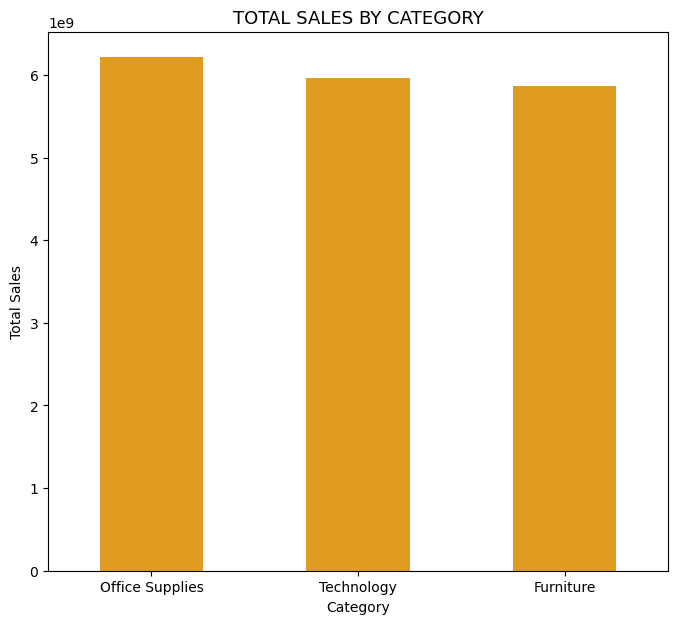

In [47]:
plt.figure(figsize=(8,7))
sns.barplot(x=category_sales.index,y=category_sales.values,color='orange',width=0.5)
plt.title('TOTAL SALES BY CATEGORY',fontsize=13)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

## Bar Chart

In [48]:
sub_category=data.groupby('Sub Category')['Total Sale'].sum().sort_values(ascending=False)

In [49]:
sub_category

Sub Category
Tables         2009314068.0
Bookcases      1943556343.0
Chairs         1935410031.0
Paper          1630418513.0
Laptops        1566303654.0
Storage        1531581051.0
Copiers        1531221952.0
Binders        1504198844.0
Writing        1496105889.0
Accessories    1476826256.0
Phones         1407515673.0
Name: Total Sale, dtype: Float64

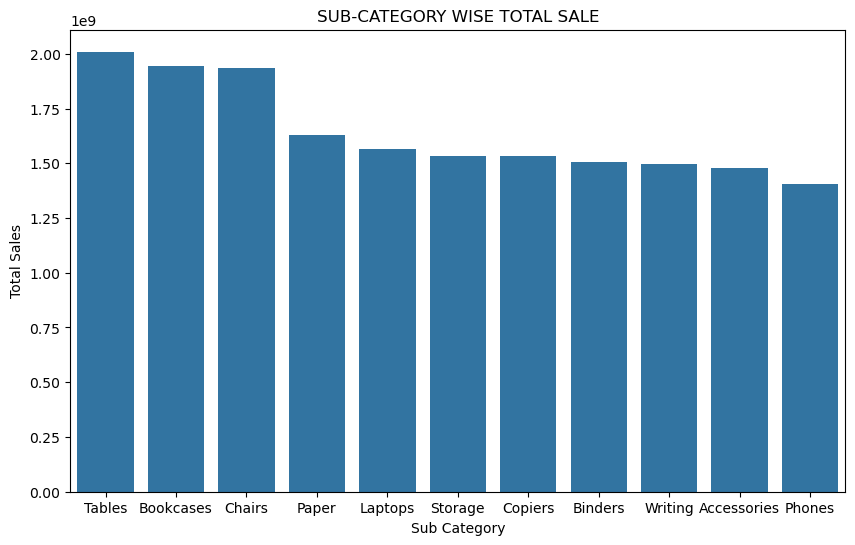

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x=sub_category.index,y=sub_category.values)
plt.title('SUB-CATEGORY WISE TOTAL SALE')
plt.ylabel('Total Sales')
plt.show()

## Segment vs total sales

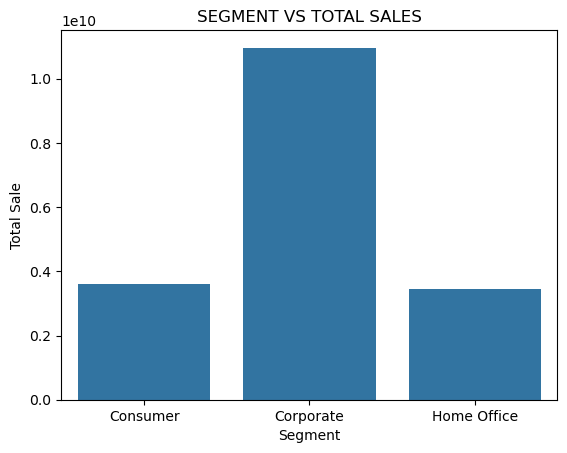

In [51]:
sns.barplot(x='Segment',y='Total Sale',data=data,estimator='sum',errorbar=None)
plt.title('SEGMENT VS TOTAL SALES')
plt.show()

## Gender Wise Order- Countplot

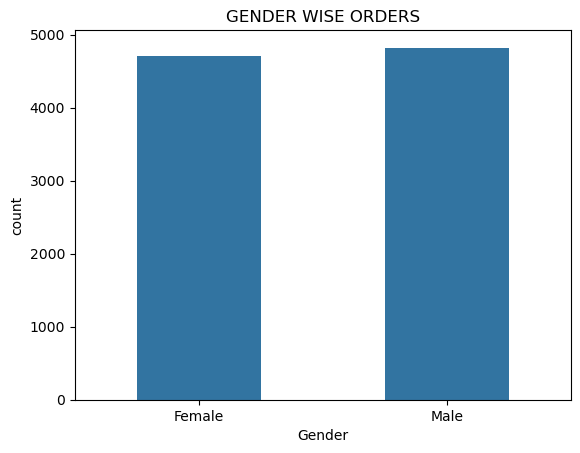

In [52]:
sns.countplot(x='Gender',data=data,width=0.5)
plt.title('GENDER WISE ORDERS')
plt.show()

In [53]:
## Pie Chart-Gender wise orders

In [54]:
gender_counts=data['Gender'].value_counts()

In [55]:
gender_counts

Gender
Male      4822
Female    4705
Name: count, dtype: int64

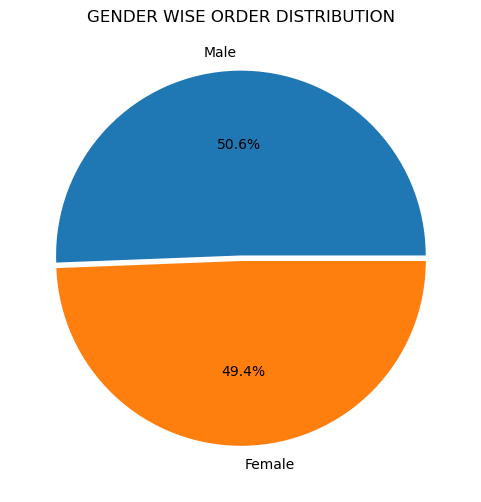

In [56]:
plt.figure(figsize=(6,6))
plt.pie(gender_counts,labels=['Male','Female'],explode=[0.03,0],autopct='%0.1f%%')
plt.title('GENDER WISE ORDER DISTRIBUTION')
plt.show()

## Yearly sales trend

In [57]:
sales_by_year=data.groupby('Year')['Total Sale'].sum().reset_index()


In [58]:
sales_by_year

,Year,Total Sale
0,2020,3179960067.0
1,2021,3126240181.0
2,2022,3132493734.0
3,2023,3013373170.0
4,2024,3130084757.0
5,2025,2450300365.0


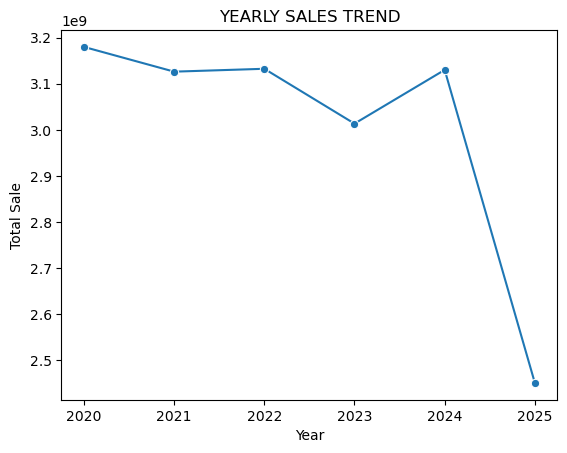

In [59]:
sns.lineplot(x='Year',y='Total Sale',data=sales_by_year,marker='o')
plt.title('YEARLY SALES TREND')
plt.show()

## Box plot for outlier detection

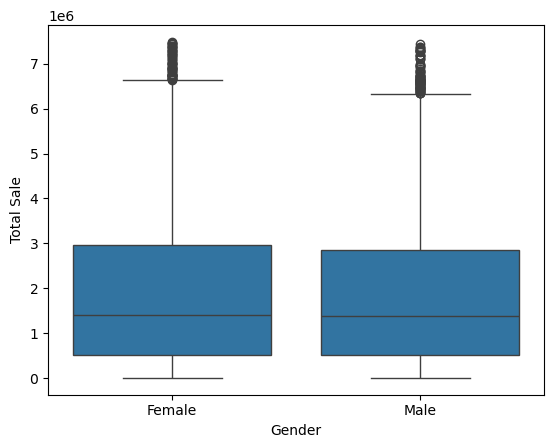

In [60]:
sns.boxplot(x='Gender',y='Total Sale',data=data)
plt.show()

## Histogram-data frequency distribution

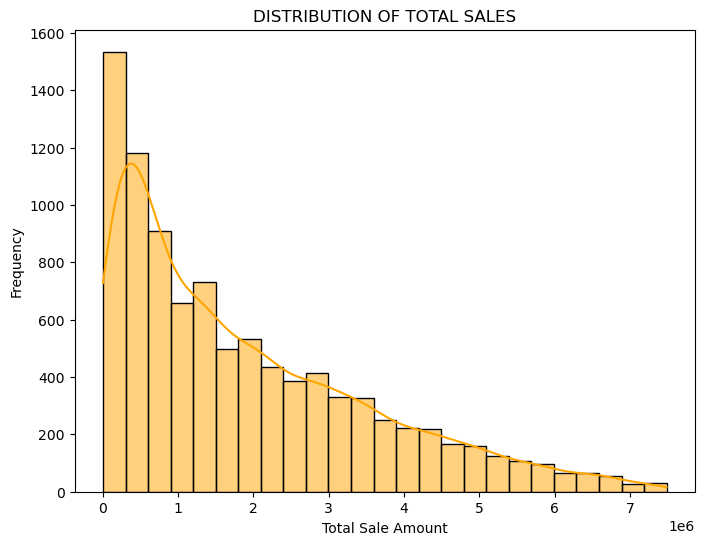

In [70]:
plt.figure(figsize=(8,6))
sns.histplot(data['Total Sale'],bins=25,color='orange',edgecolor='black',kde=True)
plt.title('DISTRIBUTION OF TOTAL SALES')
plt.xlabel('Total Sale Amount')
plt.ylabel('Frequency')
plt.show()

## KDE Plot

C:\Users\abc\AppData\Local\Temp\ipykernel_8204\351591476.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Total Sale',fill=True,data=data,hue='Segment',shade=True)


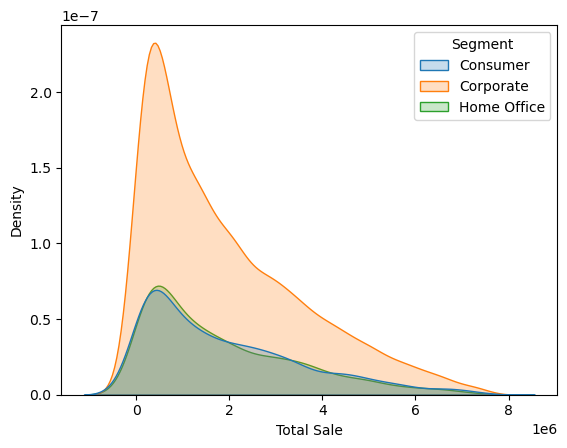

In [79]:
sns.kdeplot(x='Total Sale',fill=True,data=data,hue='Segment',shade=True)
plt.show()